요인분석은 내제 된 공통 요인을 추출하는 분석 기법

In [1]:
import pandas as pd
import numpy as np

In [3]:
df_raw = pd.read_csv('./19_py_survey.csv')
df_raw.head(5)

,id,product,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15
0,1.0,R,4.0,3.0,2.0,3.0,4.0,5.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0
1,1.0,C,2.0,5.0,3.0,3.0,4.0,5.0,1.0,4.0,3.0,4.0,3.0,3.0,5.0,3.0,3.0
2,2.0,R,2.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,3.0,3.0,1.0
3,2.0,C,1.0,5.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,5.0,1.0,2.0,3.0,1.0,2.0
4,3.0,R,4.0,2.0,2.0,1.0,2.0,4.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0


In [4]:
df = df_raw.copy()

In [5]:
df.id.nunique()

100

In [6]:
df.groupby(['product'])['id'].count()

product
C    100
R    100
Name: id, dtype: int64

In [7]:
df = df.loc[df['product'] == 'R',:].drop(['product'], axis = 1)

In [8]:
df.head()

,id,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15
0,1.0,4.0,3.0,2.0,3.0,4.0,5.0,2.0,4.0,2.0,2.0,3.0,3.0,4.0,2.0,2.0
2,2.0,2.0,2.0,3.0,2.0,2.0,4.0,4.0,4.0,4.0,2.0,2.0,2.0,3.0,3.0,1.0
4,3.0,4.0,2.0,2.0,1.0,2.0,4.0,2.0,4.0,3.0,2.0,2.0,2.0,3.0,2.0,2.0
6,4.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0
8,5.0,3.0,3.0,3.0,2.0,4.0,4.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0


In [9]:
df.describe()

,id,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.000000
mean,50.500000,2.630000,2.400000,2.760000,3.210000,3.730000,3.670000,2.71000,4.15000,2.410000,2.800000,2.300000,2.490000,2.7200,2.740000,2.380000
std,29.011492,0.895048,0.852803,0.985962,1.047315,1.081105,0.943398,1.06643,0.79614,0.922174,1.172065,0.893297,0.937383,0.9329,0.905873,0.918717
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,2.00000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000
25%,25.750000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.00000,4.00000,2.000000,2.000000,2.000000,2.000000,2.0000,2.000000,2.000000
50%,50.500000,2.000000,2.000000,3.000000,4.000000,4.000000,4.000000,3.00000,4.00000,2.000000,2.500000,2.000000,2.000000,3.0000,3.000000,2.000000
75%,75.250000,3.000000,3.000000,3.000000,4.000000,5.000000,4.000000,4.00000,5.00000,3.000000,4.000000,3.000000,3.000000,3.0000,3.000000,3.000000
max,100.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,6.00000,5.000000,5.000000,5.000000,5.000000,5.0000,5.000000,5.000000


위의 결과로 설문 문항은 1~5 까지 설정되어있으며, q8의 경우 최대값이 6으로 잘못된 코딩일 가능성 존재

확인 후, 전처리 필요

In [11]:
df.loc[df['q8'] > 5, :]

,id,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15
50,26.0,2.0,2.0,1.0,1.0,2.0,3.0,4.0,6.0,2.0,1.0,2.0,2.0,1.0,3.0,1.0


In [13]:
# 설문 문항의 답이 5 초괴하는 것들을 전치리
survey_q = df.drop(['id'], axis = 1).columns
for que in survey_q:
    df[que] = df[que].apply(lambda x : x if x <= 5 else 5)

df.loc[df['q8'] > 5, :]

,id,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15


In [22]:
#요인분석에 적합한 데이터셋 확인
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_sqare_value, p_value = calculate_bartlett_sphericity(df[survey_q])
print(chi_sqare_value, p_value)

543.1272112766703 2.8123820236708395e-60


In [23]:
# 요인분석 요인 수 탐색
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors = 15, rotation = None)
fa.fit(df[survey_q])
ev, v = fa.get_eigenvalues()
ev

array([4.12381489, 2.71282741, 1.48286057, 1.24281037, 0.95223371,
       0.8797295 , 0.59510766, 0.54112931, 0.52320364, 0.41517729,
       0.39681053, 0.32766236, 0.32011146, 0.27017993, 0.21634137])

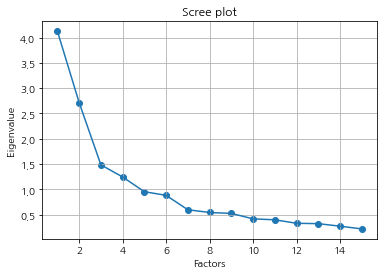

In [25]:
#ev 가 1이 넘어간 갯수만큼 요인수로 채택 or 기울기가 완만해지는 시점!
plt.scatter(range(1, df[survey_q].shape[1]+1), ev)
plt.plot(range(1, df[survey_q].shape[1]+1), ev)
plt.title('Scree plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [30]:
# 요인분석 수행
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors = 3, method = 'ml', rotation = 'varimax')
fa.fit(df[survey_q])

FactorAnalyzer(method='ml', rotation='varimax', rotation_kwargs={})

In [31]:
fa_results = pd.DataFrame(fa.loadings_, index = survey_q)
fa_results

,0,1,2
q1,0.624813,-0.083448,0.137256
q2,0.079945,0.058525,0.498116
q3,0.295671,-0.324488,0.823218
q4,0.083276,-0.046999,0.492226
q5,-0.144187,0.658515,0.013573
q6,0.021897,0.462585,0.121987
q7,0.277366,-0.632893,0.103838
q8,-0.078174,-0.162493,-0.220760
q9,0.585144,-0.317227,0.378316
q10,0.014349,0.746557,-0.091034


C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

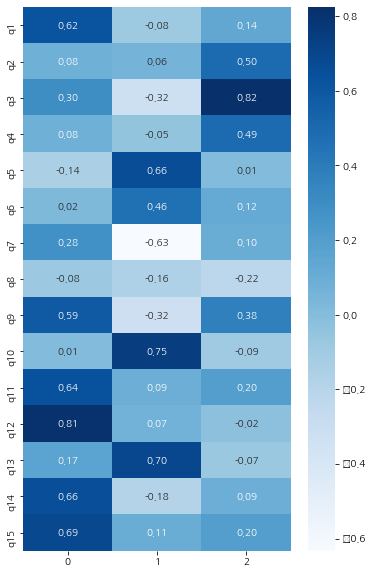

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,10))
sns.heatmap(fa_results, cmap="Blues", annot=True, fmt='.2f')

요인0 : 1,9,11,12,14,15

요인1 : 5,6,7,10,13

요인2 : 2,3,4,8

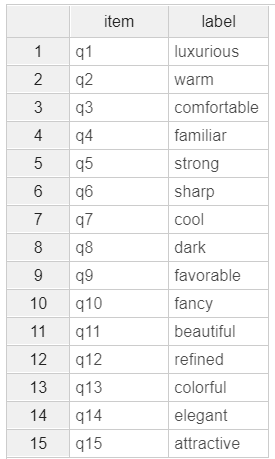

요인0 : luxurious, favorable, beautiful, refined, elegant, attractive

요인1 : strong, sharp, cool, fancy, colorful

요인2 : warm, comfortable, familiar, dark

C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chaeyoung\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

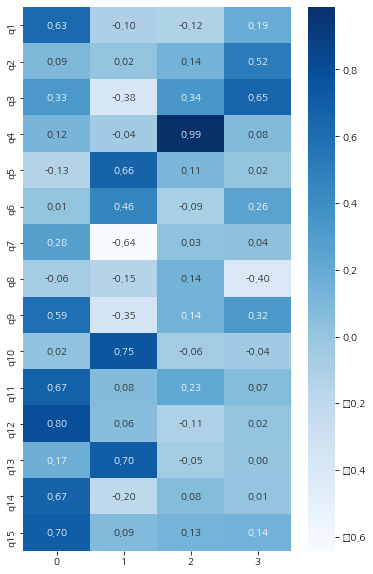

In [33]:
# 요인분석 수행
fa = FactorAnalyzer(n_factors = 4, method = 'ml', rotation = 'varimax')
fa.fit(df[survey_q])
fa_results = pd.DataFrame(fa.loadings_, index = survey_q)

plt.figure(figsize=(6,10))
sns.heatmap(fa_results, cmap="Blues", annot=True, fmt='.2f')

1,9,11,12,14,15
luxurious, favorable, beautiful, refined, elegant, attractive
5,6,10,13
strong, sharp, fancy, colorful
4,7
familiar, cool
2,3,8
warm, comfortable, dark